In [10]:
import os

os.getcwd()

'/home/horace/dev/deaths/server'

In [5]:
# import altair as alt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [6]:
# alt.data_transformers.enable("data_server")

In [11]:
ex2 = pd.read_parquet("data/ex_df.parquet")

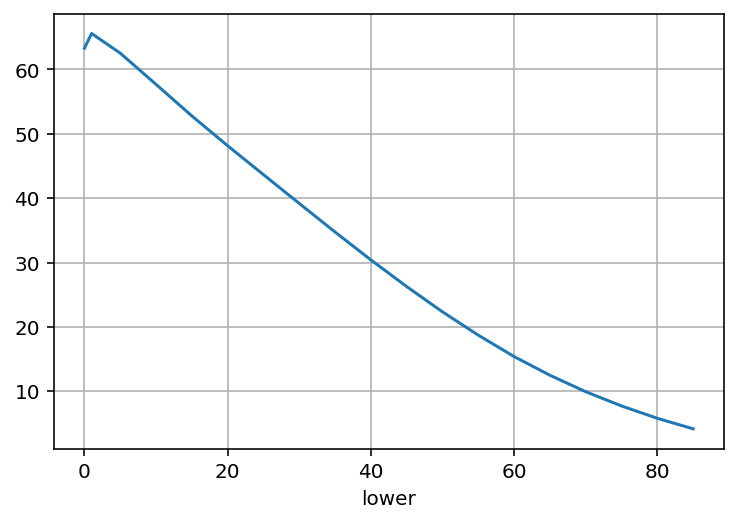

In [12]:
ex2.loc[("Afghanistan", 2019, "Male"), "remaining"].reset_index().set_index("lower")[
    "remaining"
].plot()
plt.grid()

<AxesSubplot:xlabel='mid'>

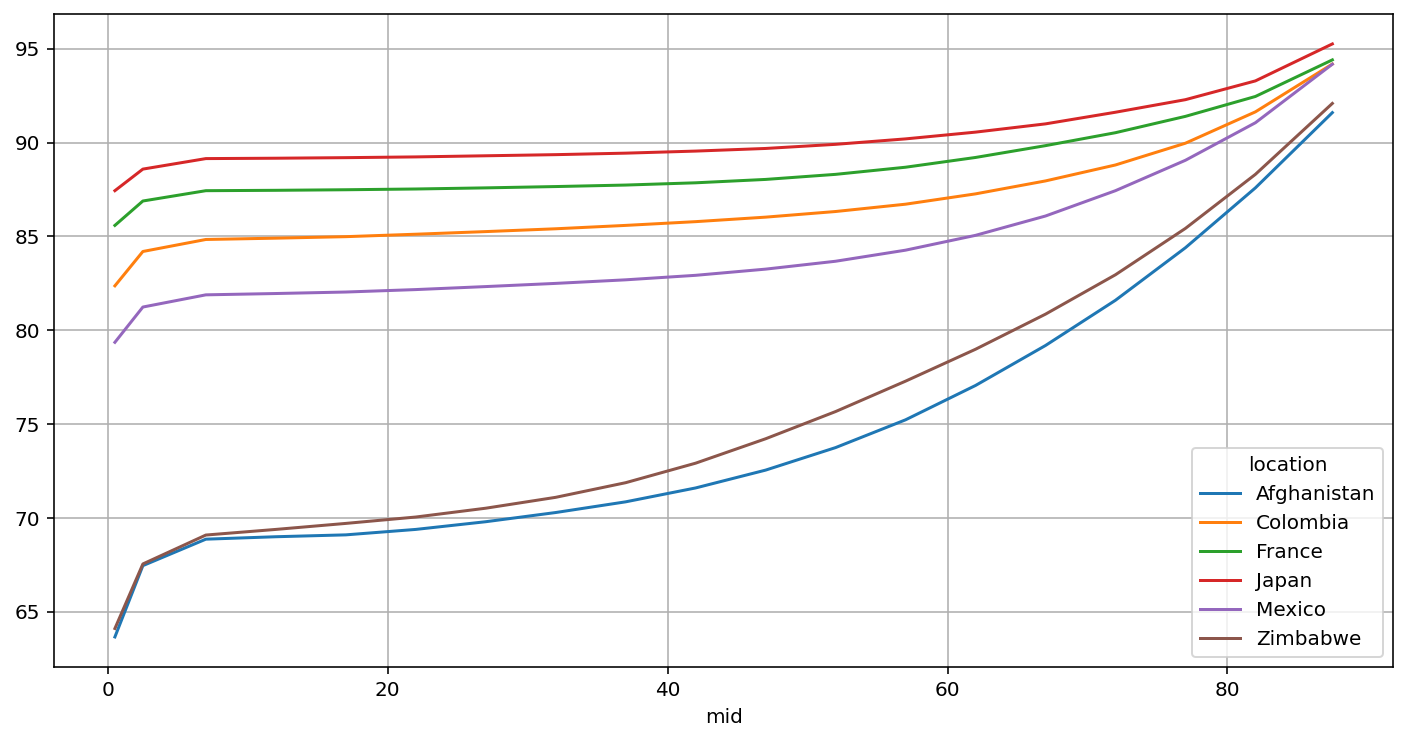

In [13]:
(
    ex2.query(
        "location in ('France', 'Afghanistan', 'Zimbabwe', 'Japan', 'Mexico', 'Colombia') and period == 2019 and sex == 'Female'"
    )
    .reset_index()
    .set_index(["location", "mid"])["total"]
    .unstack("location")
    .plot(grid=True, figsize=(12, 6))
)

In [14]:
# (
#     ex2.groupby(["parentlocation", "mid"])["total"]
#     .agg(["min", "max", "median", "mean"])
#     .rename_axis("kpi", axis=1)
#     .stack()
#     .unstack("parentlocation")
#     .groupby("kpi")
#     .apply(lambda g: (g.reset_index("kpi", drop=True).plot(title=g.name, figsize=(20, 10), grid=True, ylim=0)))
# )

In [15]:
one = ex2.loc[("Afghanistan", 2019, "Male"), :]
two = ex2.loc[("France", 2019, "Male"), :]


# def fun(x, a):
#     return x + a * np.exp(-(x + 10) / 50)


# paramsA, _ = curve_fit(fun, one["mid"].values, one["total"].values)
# paramsB, _ = curve_fit(fun, two["mid"].values, two["total"].values)
# print(paramsA, paramsB, sep="\n")

# plt.subplots(figsize=(12, 6))

# plt.plot(one["mid"].values, fun(one["mid"], *paramsA).values)
# one.set_index("mid")["total"].plot()

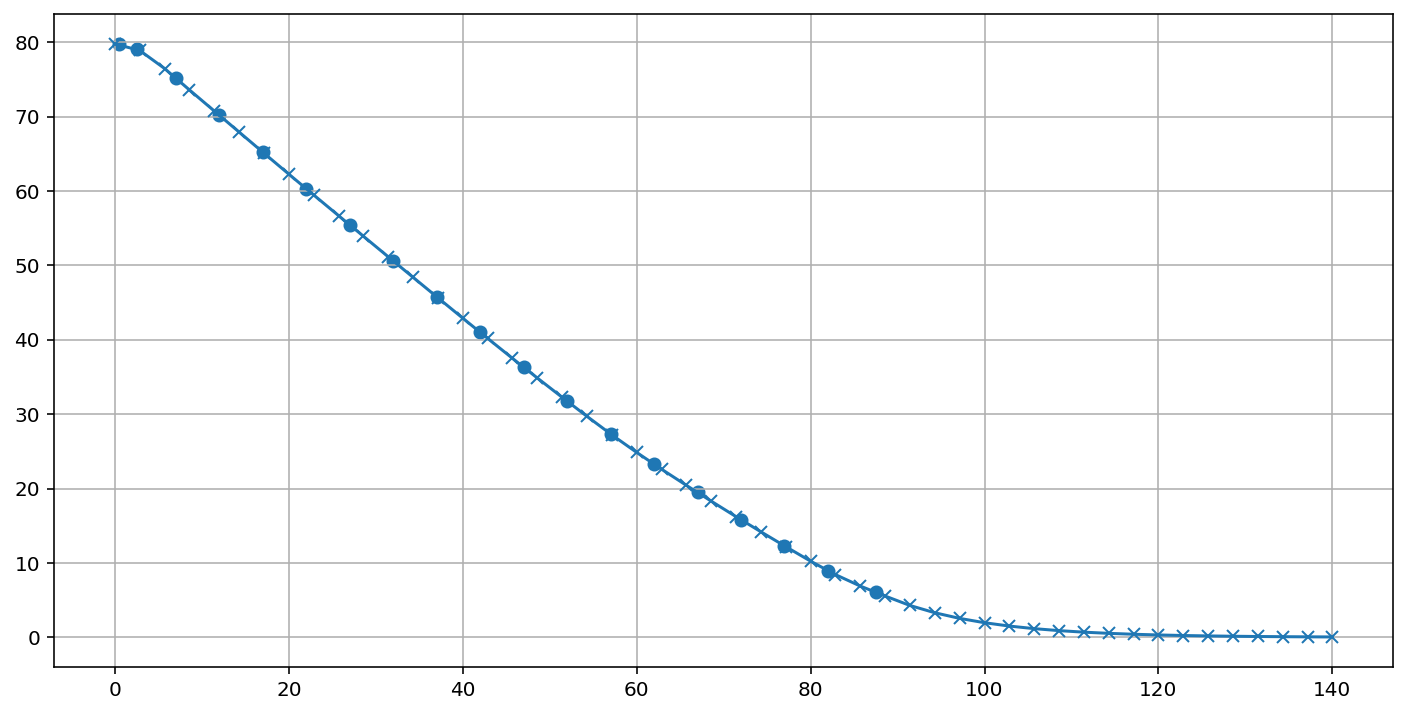

In [27]:
plt.subplots(figsize=(12, 6))

interpolated = interp1d(
    two["mid"].values,
    two["remaining"].values,
    kind="cubic",
    bounds_error=False,
    fill_value=np.nan
)
def f(x):
    xmax = interpolated.x.max()
    value = interpolated(x).squeeze()
    if value == value:
        return value
    if x < interpolated.x.min():
        return interpolated.y[0]
    elif x > xmax:
        pt = interpolated.y[-1]
        return pt * np.exp(- (x - xmax) / 11)
    
fv = np.vectorize(f)

x = np.linspace(0, 140, 50)
plt.plot(x, fv(x), marker="x")
plt.scatter(two["mid"].values, two["remaining"].values)
plt.grid()
# plt.ylim(0)